In [1]:
# Import NLTK library 
import nltk
import pandas as pd 

In [2]:
df = pd.read_csv('financial_news.csv')
# Use the head method to display the first rows in the Pandas DataFrame df
df.head()
df.shape
# Count the number of "neutral", "positive", and "negative" samples in the "Label" column
df['Label'].value_counts()


Label
neutral     6179
positive    1927
negative    1443
Name: count, dtype: int64

In [3]:
# Let's import the regular expressions (re) module in Python 
# A regular expression is a sequence of characters that specifies a match pattern in text
# Regular expressions are commonly used for search operations on Strings
import re
# Let's download common s
# Let's download common stop words present in the English language from the nltk library
# Stop words are a set of commonly used words such as “is” and “and”
nltk.download('stopwords')
from nltk.corpus import stopwords
set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adars\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [4]:

# Let's define a function that performs data cleaning by removing stop words and non-alphanumeric characters 
# The function takes in a string of text, removes non-alphanumeric characters, converts text to lower case, 
# removes stop words and returns cleaned text in a String format

def clean_text(text):
    # Let's remove non-alphanumeric charachters 
    # The re.sub() returns a string where all matching occurrences of the given pattern are replaced by the provided string
    # This is a regular expression to remove any non-alphanumeric from a string variable called text
    # a-zA-Z0-9 means alphanumeric characters (letters and digits) 
    # a-z and A-Z specify all letters and 0-9 specifies all digits
    # ^ means negated character set
    # Note that "r" creates a raw string that do not process escape sequences (\n)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Convert text to lower case
    text = text.lower()
    # Remove stop words 
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    # Join words back into a single string
    cleaned_text = ' '.join(words)
    return cleaned_text

# Let's test out the Python Function 
clean_text('WELCOME to this practical skills module!!')
# Let's apply the Python Function to the entire Pandas DataFrame
df['Cleaned Text'] = df['Text'].apply(clean_text)
# Let's display the Pandas DataFrame
df


,Text,Label,Cleaned Text
0,Amazon to create 500 new jobs in Mississippi a...,positive,amazon create 500 new jobs mississippi builds ...
1,"GE's stock rises 1% premarket, set to trade ab...",positive,ges stock rises 1 premarket set trade 13 1st t...
2,"CN Rail Strike Begins, Threatening Canada Oil,...",negative,cn rail strike begins threatening canada oil g...
3,"Hong Kong Airlines to cut 400 jobs, ask employ...",negative,hong kong airlines cut 400 jobs ask employees ...
4,3 Top-Performing Mutual Funds to Consider for ...,neutral,3 topperforming mutual funds consider retireme...
...,...,...,...
9544,Stock Market Update: Boeing turns positive,positive,stock market update boeing turns positive
9545,33 genius travel hacks to upgrade your holiday...,neutral,33 genius travel hacks upgrade holiday trips h...
9546,Hong Kong stocks increased 4% as China relaxes...,positive,hong kong stocks increased 4 china relaxes vir...
9547,Novo Nordisk stock increased by 2% in today's ...,positive,novo nordisk stock increased 2 todays trading ...


In [5]:

# Let's define a function that receives a string of text and generates word cloud visualization 
# The Python Function also removes custom stop words such as politics-related words before generating the word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
def generate_word_cloud(text):
    
    # Add custom stop words
    custom_stopwords = {"http", "china", "us", "united states", "political", "politics","stock","stocks", "trump"}
    # Update the default stop words included in the WordCloud library with our custom stop words
    stopwords = set(STOPWORDS)
    stopwords.update(custom_stopwords)

    # Generate the WordCloud object
    wordcloud = WordCloud(width = 1600, height = 800, stopwords = stopwords, min_font_size = 10).generate(text)

    # Display the WordCloud 
    plt.figure(figsize = (12, 12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


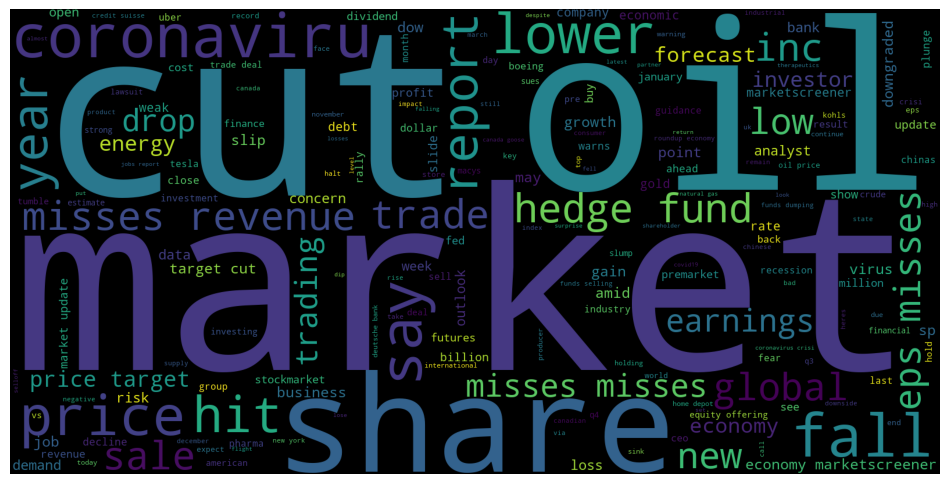

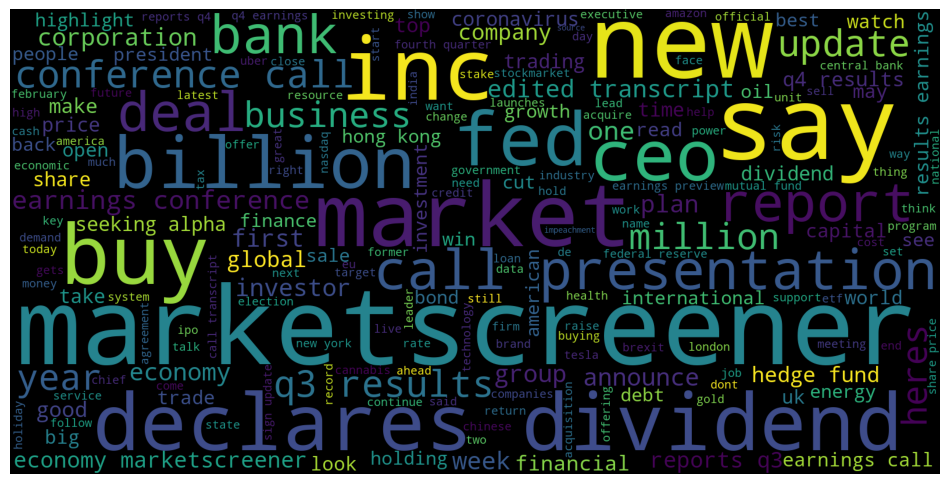

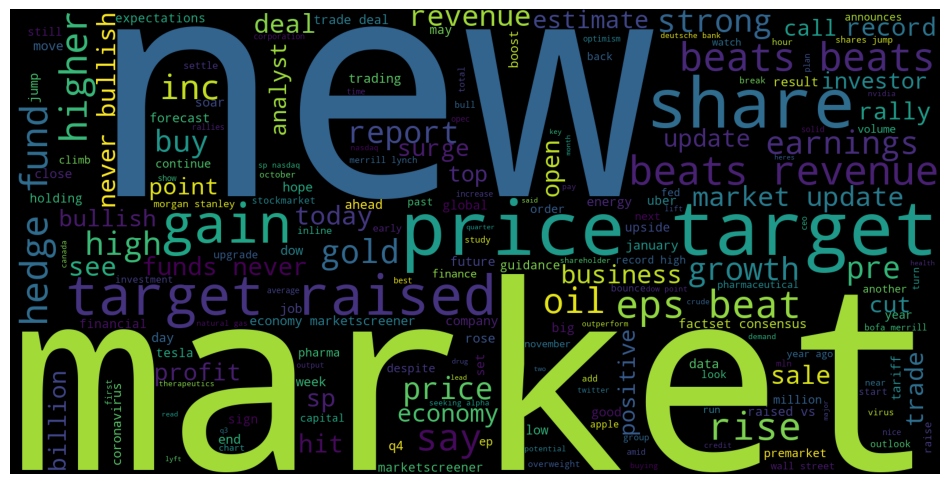

In [6]:
# Generate word cloud visualization for text with negative,neutral and positive sentiment
generate_word_cloud(" ".join(df[df['Label'] == 'negative']['Cleaned Text']))

generate_word_cloud(" ".join(df[df['Label'] == 'neutral']['Cleaned Text']))

generate_word_cloud(" ".join(df[df['Label'] == 'positive']['Cleaned Text']))

In [7]:
# Let's perform text data encoding by converting text into numbers to be used for model training
# FinBERT is a pre-trained NLP model to analyze sentiment of financial text
# Hugging Face is a popular community and data science platform that offers tools to build, train and deploy AI/ML models
# Prosus is a global consumer internet group and one of the largest technology investors in the world
# Source: https://huggingface.co/ProsusAI/finbert

from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
news_1 = "Hong Kong stocks increased 4% as China relaxes virus rules"
news_2 = "Novo Nordisk stock increased by 2% in today's trading session"
news_3 = "Amazon stock lost half its value this year as tech stocks got crushed and recession fears grew"
# View an encoded version of a sample dataset #1
encoded_news_1 = tokenizer.encode(news_1)
print(encoded_news_1)
# View an encoded version of a sample dataset #2
encoded_news_2 = tokenizer.encode(news_2)
print(encoded_news_2)
# View an encoded version of a sample dataset #3
encoded_news_3 = tokenizer.encode(news_3)
print(encoded_news_3)


[101, 4291, 4290, 15768, 3445, 1018, 1003, 2004, 2859, 9483, 2229, 7865, 3513, 102]
[101, 24576, 13926, 20573, 4518, 3445, 2011, 1016, 1003, 1999, 2651, 1005, 1055, 6202, 5219, 102]
[101, 9733, 4518, 2439, 2431, 2049, 3643, 2023, 2095, 2004, 6627, 15768, 2288, 10560, 1998, 19396, 10069, 3473, 102]


In [8]:
# Data has to be converted to tensors so we can perform padding 
# PyTorch is a widely used framework developed my META that offers an easy-to-use interface for building, training and testing ANNs 
# Tensors are the main data structure used in PyTorch to represent multi-dimensional arrays, such as images, text, or audio 
# Tensors can be created from Numpy arrays or from Python Lists

# Let's import torch and perform sequence padding
import torch
from torch.nn.utils.rnn import pad_sequence
padded_sequence = pad_sequence([torch.tensor(encoded_news_1), torch.tensor(encoded_news_2), torch.tensor(encoded_news_3)], batch_first = True, padding_value = 0).numpy()
padded_sequence

array([[  101,  4291,  4290, 15768,  3445,  1018,  1003,  2004,  2859,
         9483,  2229,  7865,  3513,   102,     0,     0,     0,     0,
            0],
       [  101, 24576, 13926, 20573,  4518,  3445,  2011,  1016,  1003,
         1999,  2651,  1005,  1055,  6202,  5219,   102,     0,     0,
            0],
       [  101,  9733,  4518,  2439,  2431,  2049,  3643,  2023,  2095,
         2004,  6627, 15768,  2288, 10560,  1998, 19396, 10069,  3473,
          102]], dtype=int64)

In [9]:
# Let's define a Python Function that performs tokenization and padding to text data in DataFrames
def tokenization_padding(df):

    # Use Python List Comprehension to tokenize every row in the Pandas DataFrame "df" 
    df['Encoded Text'] = [tokenizer.encode(news) for news in df['Cleaned Text'].tolist()]

    # Convert data into tensors using List Comprehension and then perform Zero-Padding to ensure that data has the same length
    encoded_news_tensor = [torch.tensor(encoded_news) for encoded_news in df['Encoded Text'].tolist()]
    padded_sequence = pad_sequence(encoded_news_tensor, batch_first = True, padding_value = 0).numpy()

    return padded_sequence

In [10]:
X = tokenization_padding(df)
print(X)
# Let's check out the shape of X
X.shape

[[  101  9733  3443 ...     0     0     0]
 [  101 16216  2015 ...     0     0     0]
 [  101 27166  4334 ...     0     0     0]
 ...
 [  101  4291  4290 ...     0     0     0]
 [  101 24576 13926 ...     0     0     0]
 [  101  9733  4518 ...     0     0     0]]


(9549, 61)

In [11]:
# Let's encode the label (target) column as follows:  
    # positive = 0
    # negative = 1
    # neutral  = 2
df['Encoded Label'] = df['Label'].replace('positive', 0).replace('negative', 1).replace('neutral', 2)
df

,Text,Label,Cleaned Text,Encoded Text,Encoded Label
0,Amazon to create 500 new jobs in Mississippi a...,positive,amazon create 500 new jobs mississippi builds ...,"[101, 9733, 3443, 3156, 2047, 5841, 5900, 1647...",0
1,"GE's stock rises 1% premarket, set to trade ab...",positive,ges stock rises 1 premarket set trade 13 1st t...,"[101, 16216, 2015, 4518, 9466, 1015, 26563, 17...",0
2,"CN Rail Strike Begins, Threatening Canada Oil,...",negative,cn rail strike begins threatening canada oil g...,"[101, 27166, 4334, 4894, 4269, 8701, 2710, 351...",1
3,"Hong Kong Airlines to cut 400 jobs, ask employ...",negative,hong kong airlines cut 400 jobs ask employees ...,"[101, 4291, 4290, 7608, 3013, 4278, 5841, 3198...",1
4,3 Top-Performing Mutual Funds to Consider for ...,neutral,3 topperforming mutual funds consider retireme...,"[101, 1017, 2327, 4842, 14192, 2075, 8203, 502...",2
...,...,...,...,...,...
9544,Stock Market Update: Boeing turns positive,positive,stock market update boeing turns positive,"[101, 4518, 3006, 10651, 10321, 4332, 3893, 102]",0
9545,33 genius travel hacks to upgrade your holiday...,neutral,33 genius travel hacks upgrade holiday trips h...,"[101, 3943, 11067, 3604, 20578, 2015, 12200, 6...",2
9546,Hong Kong stocks increased 4% as China relaxes...,positive,hong kong stocks increased 4 china relaxes vir...,"[101, 4291, 4290, 15768, 3445, 1018, 2859, 948...",0
9547,Novo Nordisk stock increased by 2% in today's ...,positive,novo nordisk stock increased 2 todays trading ...,"[101, 24576, 13926, 20573, 4518, 3445, 1016, 2...",0


In [12]:
# The encoded label will be the output from the model "y"
y = df['Encoded Label'] 
y

0       0
1       0
2       1
3       1
4       2
       ..
9544    0
9545    2
9546    0
9547    0
9548    1
Name: Encoded Label, Length: 9549, dtype: int64

In [14]:
# Let's use Scikit-Learn to split the data into training, validation and testing subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, shuffle = True)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(6684, 61)
(1432, 61)
(1433, 61)
(6684,)
(1432,)
(1433,)


In [15]:

#We will build a classic LSTM neural network using Keras and Tensorflow 
# Note that transformer-based ANNs outperform classic LSTMs 
# Transformers use self-attention mechanism to capture long-range dependencies in the input sequence so...
# They can capture contextual information better compared to classic LSTMs 
# We will leverage pre-trained transformer-based BERT models in the next few lessons

# Let's import Tensorflow 
# Tensorflow is an open-source library developed by Google 
# Tensorflow is used for artificial intelligence models training and deployment

# Let's train an Artificial Neural Network to solve regression type problems using Tensorflow and Keras

import tensorflow as tf
from tensorflow import keras

# Build an LSTM Neural Network using Keras
# LSTM is a type of recurrent neural network that works by capturing long-term dependencies in the input sequence 

# Embedding represents words or symbols as fixed-length vectors of real numbers. 
# This is performed to convert discrete inputs (ex: words) into continuous-valued inputs to be processed by LSTM network
# The embedding layer takes a sequence of input symbols and maps them to a dense vector space
# It is initialized with random values and trained jointly with the rest of the LSTM model

# The number of units in the LSTM layer determines the number of memory cells in the network 
# which determines how much of the past information can be retained and used to make predictions
# We chose an LSTM with 64 units because it offers a good balance between model complexity and performance
# After the LSTM layer, we will flatten the output to get a one-dimensional vector 
# Afterwards, we pass the flattened vector through a dense layer with a softmax activation function to obtain the final output

# Activation functions are used in ANNs to introduce non-linearity into the network
# Two activation functions are used: 
    # tanh: It maps the input values to the range of [-1, 1], which can be useful in normalizing the input 
    # tanh is often used in the hidden layers of ANNs

    # softmax: It converts a vector of numbers into a vector of probabilities
    # softmax is used in the output layer of a classification ANNs 
     
# The FinBERT tokenizer is used to pre-process text data before it is fed into the ANN model
# The tokenizer maps each word or subword in the input text to a unique integer ID from the vocabulary
# The input dimension of the ANN is determined by the length of the maximum sequence of words in the input data 
# The output dimension is 768 because the pre-trained FinBERT model used in this project has 768 hidden units in its last layer 
    
inputs = tf.keras.Input(shape = (X_train.shape[1],))

x = tf.keras.layers.Embedding(input_dim = tokenizer.vocab_size,
                              output_dim = 768,
                              input_length = X_train.shape[1])(inputs)

x = tf.keras.layers.LSTM(64, return_sequences = True, activation = 'tanh')(x)
x = tf.keras.layers.Flatten()(x)

outputs = tf.keras.layers.Dense(3, activation = 'softmax')(x)
model = tf.keras.Model(inputs = inputs, outputs = outputs)

# Compile the model and choose the optimizer
# Adam optimizer works well in several deep learning applications such as computer vision and natural language processing 

#Cross entropy loss is a commonly used loss function in classification problems
# The goal is to predict a probability distribution over a set of classes
# Cross entropy loss measures the difference between predicted probability distribution and true distribution of the labels 
# "sparse_categorical_crossentropy" loss is used to measure the difference between the predicted sentiment class 
# and the true (ground truth) setiment label class
# The objective is to minimize this loss during training in order to improve the accuracy of model predictions

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# Display a summary of the LSTM model
model.summary()
# Train the model
history = model.fit(X_train,
                    y_train,
                    validation_data = (X_val, y_val),
                    batch_size = 32,
                    epochs = 3)




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 61)]              0         
                                                                 
 embedding (Embedding)       (None, 61, 768)           23440896  
                                                                 
 lstm (LSTM)                 (None, 61, 64)            213248    
                                                                 
 flatten (Flatten)           (None, 3904)              0         
                                                                 
 dense (Dense)               (None, 3)                 11715     
                                                                 
Total params: 23665859 (90.28 MB)
Trainable params: 23665859 (90.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/3


209/

In [16]:
# Evaluate trained model performance using the test subset
results = model.evaluate(X_test, y_test)
# Let's print the model accuracy 
print("Test Accuracy: {:.2f}%".format(results[1] * 100))
# Generate predictions using the trained LSTM model
predictions = model.predict(X_test)
predictions

45/45 [==============================] - 2s 34ms/step - loss: 0.9910 - accuracy: 0.7486
Test Accuracy: 74.86%
45/45 [==============================] - 3s 31ms/step


array([[3.6335754e-01, 2.9675834e-02, 6.0696661e-01],
       [9.9674004e-01, 3.1476449e-03, 1.1226769e-04],
       [4.1368385e-05, 1.9636596e-05, 9.9993896e-01],
       ...,
       [1.4829840e-02, 9.3603617e-01, 4.9134009e-02],
       [1.1958938e-02, 1.6010670e-01, 8.2793432e-01],
       [1.3338393e-02, 1.0340741e-02, 9.7632092e-01]], dtype=float32)

In [17]:
# Let's convert probabilities into labels 0, 1, and 2 so we can compare them to the ground truth labels
# Argmax is used to obtain an array of indices of max values of a given array 
import numpy as np
y_predict = []
for i in predictions:
  y_predict.append(np.argmax(i))

print(y_predict)
# Let's display the ground truth data
y_test

[2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 1, 2, 2, 1, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 1, 2, 0, 2, 2, 1, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 1, 0, 2, 1, 1, 2, 2, 2, 2, 0, 1, 2, 0, 1, 2, 2, 0, 2, 1, 2, 0, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 

3536    2
5765    0
6390    2
9274    2
6493    2
       ..
5473    2
3742    2
7578    2
4643    0
381     2
Name: Encoded Label, Length: 1432, dtype: int64

              precision    recall  f1-score   support

           0       0.67      0.59      0.63       282
           1       0.51      0.49      0.50       216
           2       0.82      0.86      0.84       934

    accuracy                           0.75      1432
   macro avg       0.66      0.65      0.65      1432
weighted avg       0.74      0.75      0.75      1432



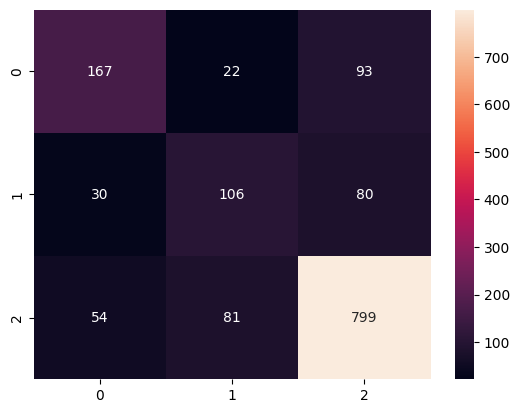

In [18]:
import seaborn as sns
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, fmt = 'd', annot = True)
# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

In [19]:
# Let's use pre-trained language models 
# from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from transformers import AutoTokenizer, pipeline
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
sentiment_pipeline = pipeline("sentiment-analysis", model = "ProsusAI/finbert", tokenizer = tokenizer)

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\adars\.cache\huggingface\hub\models--ProsusAI--finbert. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [21]:
# Let's test the pre-trained language model 
news_1 = "Finnish media group Talentum has issued a profit warning"
news_2 = "Amazon stock increased by 2%"
sentiment_pipeline(news_2)

[{'label': 'positive', 'score': 0.9482478499412537}]

In [22]:
df['Text'].tolist()[0]

'Amazon to create 500 new jobs in Mississippi as it builds new fulfillment center'

In [23]:
# Let's generate sentiment prediction using our pre-trained model 
sentiment_pipeline(df['Text'].tolist()[0])

[{'label': 'positive', 'score': 0.832364022731781}]

In [24]:
X_train.shape

(6684, 61)

In [25]:
# Obtain the testing dataset 
test_df = df[X_train.shape[0] + X_val.shape[0]:].copy()
test_df

,Text,Label,Cleaned Text,Encoded Text,Encoded Label
8117,Nokia is Preparing to Come Roaring Back in the...,positive,nokia preparing come roaring back new decade,"[101, 22098, 8225, 2272, 17197, 2067, 2047, 54...",0
8118,"ICYMI: Actually, Teslas are among the *least* ...",neutral,icymi actually teslas among least stolen vehic...,"[101, 13580, 4328, 2941, 26060, 2015, 2426, 25...",2
8119,Buchanan Health Center Opens New The Villages ...,neutral,buchanan health center opens new villages loca...,"[101, 14349, 2740, 2415, 7480, 2047, 4731, 329...",2
8120,https://t.co/9eZPvQhfMq,neutral,httpstco9ezpvqhfmq,"[101, 16770, 13535, 2080, 2683, 9351, 2361, 26...",2
8121,VIVUS up 8% premarket on positive Qsymia effec...,positive,vivus 8 premarket positive qsymia effect binge...,"[101, 6819, 27500, 1022, 26563, 17007, 3388, 3...",0
...,...,...,...,...,...
9544,Stock Market Update: Boeing turns positive,positive,stock market update boeing turns positive,"[101, 4518, 3006, 10651, 10321, 4332, 3893, 102]",0
9545,33 genius travel hacks to upgrade your holiday...,neutral,33 genius travel hacks upgrade holiday trips h...,"[101, 3943, 11067, 3604, 20578, 2015, 12200, 6...",2
9546,Hong Kong stocks increased 4% as China relaxes...,positive,hong kong stocks increased 4 china relaxes vir...,"[101, 4291, 4290, 15768, 3445, 1018, 2859, 948...",0
9547,Novo Nordisk stock increased by 2% in today's ...,positive,novo nordisk stock increased 2 todays trading ...,"[101, 24576, 13926, 20573, 4518, 3445, 1016, 2...",0


In [26]:
# Let's generate sentiment using the testing text news dataset
test_df['pretrained_model_prediction'] = test_df['Text'].apply(lambda x: sentiment_pipeline(x)[0]['label'])

In [27]:
# Let's display the DataFrame
test_df

,Text,Label,Cleaned Text,Encoded Text,Encoded Label,pretrained_model_prediction
8117,Nokia is Preparing to Come Roaring Back in the...,positive,nokia preparing come roaring back new decade,"[101, 22098, 8225, 2272, 17197, 2067, 2047, 54...",0,positive
8118,"ICYMI: Actually, Teslas are among the *least* ...",neutral,icymi actually teslas among least stolen vehic...,"[101, 13580, 4328, 2941, 26060, 2015, 2426, 25...",2,neutral
8119,Buchanan Health Center Opens New The Villages ...,neutral,buchanan health center opens new villages loca...,"[101, 14349, 2740, 2415, 7480, 2047, 4731, 329...",2,neutral
8120,https://t.co/9eZPvQhfMq,neutral,httpstco9ezpvqhfmq,"[101, 16770, 13535, 2080, 2683, 9351, 2361, 26...",2,neutral
8121,VIVUS up 8% premarket on positive Qsymia effec...,positive,vivus 8 premarket positive qsymia effect binge...,"[101, 6819, 27500, 1022, 26563, 17007, 3388, 3...",0,positive
...,...,...,...,...,...,...
9544,Stock Market Update: Boeing turns positive,positive,stock market update boeing turns positive,"[101, 4518, 3006, 10651, 10321, 4332, 3893, 102]",0,positive
9545,33 genius travel hacks to upgrade your holiday...,neutral,33 genius travel hacks upgrade holiday trips h...,"[101, 3943, 11067, 3604, 20578, 2015, 12200, 6...",2,neutral
9546,Hong Kong stocks increased 4% as China relaxes...,positive,hong kong stocks increased 4 china relaxes vir...,"[101, 4291, 4290, 15768, 3445, 1018, 2859, 948...",0,positive
9547,Novo Nordisk stock increased by 2% in today's ...,positive,novo nordisk stock increased 2 todays trading ...,"[101, 24576, 13926, 20573, 4518, 3445, 1016, 2...",0,positive


In [28]:
# Let's generate metrics by comparing model predictions to ground truth dataset
from sklearn.metrics import accuracy_score
print("Test Accuracy: {:.2f}%".format(accuracy_score(test_df['Label'], test_df['pretrained_model_prediction']) * 100))

Test Accuracy: 71.72%


In [31]:
n1="Emerging market stocks extended their lead over US shares in the early days of the new year, with the equity benchmark rising to a six-month high against the S&P 500 Index"
n2="Cape Town-based Naspers, founded more than 100 years ago, bought its 33% stake in Tencent in 2004 for just $231 million. That shareholding has since soared almost 50,000% in value to today’s $114 billion"
n3="Amazon lost half its value this year as tech stocks got crushed and recession fears grew"
sentiment_pipeline(n3)

[{'label': 'negative', 'score': 0.9686993360519409}]